# Importing the dependencies

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split   #splitting into training and test dataset
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso                 #models for training dataset
from sklearn import metrics                            #evaluates model
%matplotlib inline

# Data Collection

In [7]:
df1=pd.read_csv("car data.csv")

In [41]:
df1.head(5)


,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


# Data Pre-proccesing

In [63]:
df1.shape

(301, 9)

In [71]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [75]:
df1.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [81]:
df1["Fuel_Type"].value_counts()

Fuel_Type
Petrol    239
Diesel     60
CNG         2
Name: count, dtype: int64

In [83]:
df1["Seller_Type"].value_counts()

Seller_Type
Dealer        195
Individual    106
Name: count, dtype: int64

In [85]:
df1["Transmission"].value_counts()

Transmission
Manual       261
Automatic     40
Name: count, dtype: int64

## Encoding categorical data

In [114]:
df1.replace({"Fuel_Type":{"Petrol":0,"Diesel":1,"CNG":2}},inplace=True)

In [118]:
df1.replace({"Seller_Type":{"Dealer":0,"Individual":1}},inplace=True)

In [120]:
df1.replace({"Transmission":{"Manual":0,"Automatic":1}},inplace=True)

In [124]:
df1.drop(columns=['fuel_type_encoded'], inplace=True)


In [126]:
df1.drop(columns=['seller_type_encoded'], inplace=True)


In [128]:
df1.drop(columns=['transmission_encoded'], inplace=True)


In [134]:
df1.head(5)

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,0,0,0
1,sx4,2013,4.75,9.54,43000,1,0,0,0
2,ciaz,2017,7.25,9.85,6900,0,0,0,0
3,wagon r,2011,2.85,4.15,5200,0,0,0,0
4,swift,2014,4.60,6.87,42450,1,0,0,0


### use of replace instead of mapping:

 1) mapping creates a new column to map new values given by us
 2) replace doesn't create new column and oes modification in the same column
 3) mapping returns NaN values for any value that does not have a corresponding key, while replace will keep the original value if it doesn't find a match

# splitting dataset into training and test data

1) x stores all the features
2) y stores seling price as it is our target output
3) we would be removing car name, as it won't be beneficial for prediction

In [140]:
# when dropping a column, axis=1
# when dropping a row, axis=0
x=df1.drop(["Car_Name","Selling_Price"],axis=1)
y=df1["Selling_Price"]

In [142]:
x   #all the features

,Year,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,2014,5.59,27000,0,0,0,0
1,2013,9.54,43000,1,0,0,0
2,2017,9.85,6900,0,0,0,0
3,2011,4.15,5200,0,0,0,0
4,2014,6.87,42450,1,0,0,0
...,...,...,...,...,...,...,...
296,2016,11.60,33988,1,0,0,0
297,2015,5.90,60000,0,0,0,0
298,2009,11.00,87934,0,0,0,0
299,2017,12.50,9000,1,0,0,0


In [144]:
y   #target variable

0       3.35
1       4.75
2       7.25
3       2.85
4       4.60
       ...  
296     9.50
297     4.00
298     3.35
299    11.50
300     5.30
Name: Selling_Price, Length: 301, dtype: float64

In [146]:
# splilling data into training set and test set

In [148]:
x_train, x_test,y_train,y_test=train_test_split(x,y,test_size=0.1,random_state=2)
# data splits in 2 in random_state=2

## Model Training (Linear Regression)

In [152]:
lin_reg_model=LinearRegression()

In [156]:
# model.fit is used for training model
lin_reg_model.fit(x_train,y_train)

LinearRegression()

## Model Evaluation

In [159]:
# prediction on training data

#predicts price of cars based on the features we have provided in x_train
training_data_prediction=lin_reg_model.predict(x_train)

In [161]:
#comparing target output (y_train) and predicted output made by x_train

In [166]:
# R squared error
error_score=metrics.r2_score(y_train, training_data_prediction)
print(error_score)

0.8799451660493698


In [168]:
# error_score is near to 1, hence it shows that predicted values are nearer to target values

In [170]:
#accuracy_score for classification regression
#R squared score for linear regression

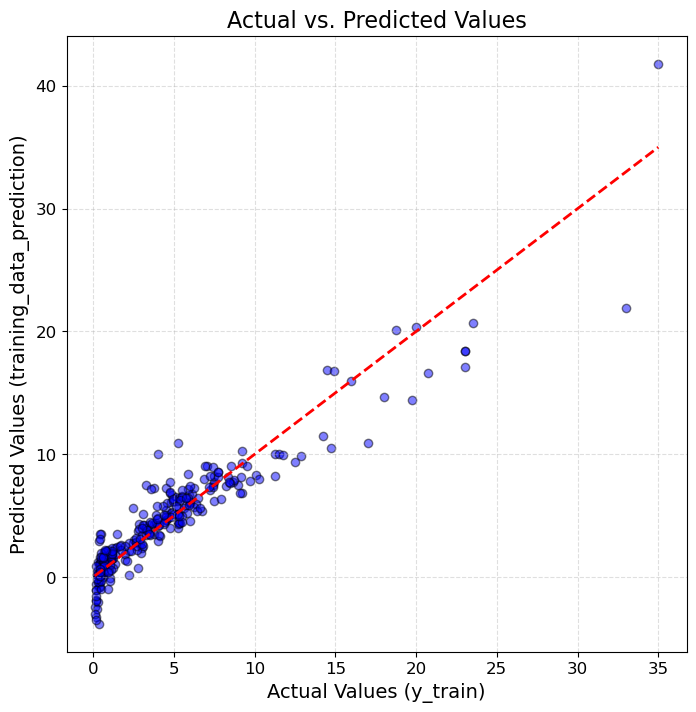

In [194]:
#comparing actual and predicted selling_prices for training data

plt.figure(figsize=(8, 8))

# Scatter plot
plt.scatter(y_train, training_data_prediction, color='blue', marker='o', edgecolor='black', alpha=0.5) #alpha for transparency

# Adding a reference line (y = x)
plt.plot([min(y_train), max(y_train)], [min(y_train), max(y_train)], color='red', linestyle='--', linewidth=2)

# Titles and labels
plt.title('Actual vs. Predicted Values', fontsize=16)
plt.xlabel('Actual Values (y_train)', fontsize=14)
plt.ylabel('Predicted Values (training_data_prediction)', fontsize=14)

# Grid
plt.grid(True, linestyle='--', alpha=0.4)

# Customize ticks
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Show the plot
plt.show()


In [190]:
# prediction on test data

#predicts price of cars based on the features we have provided in x_test
test_data_prediction=lin_reg_model.predict(x_test)

In [192]:
# R squared error
error_score2=metrics.r2_score(y_test, test_data_prediction)
print(error_score2)

0.8365766715026903


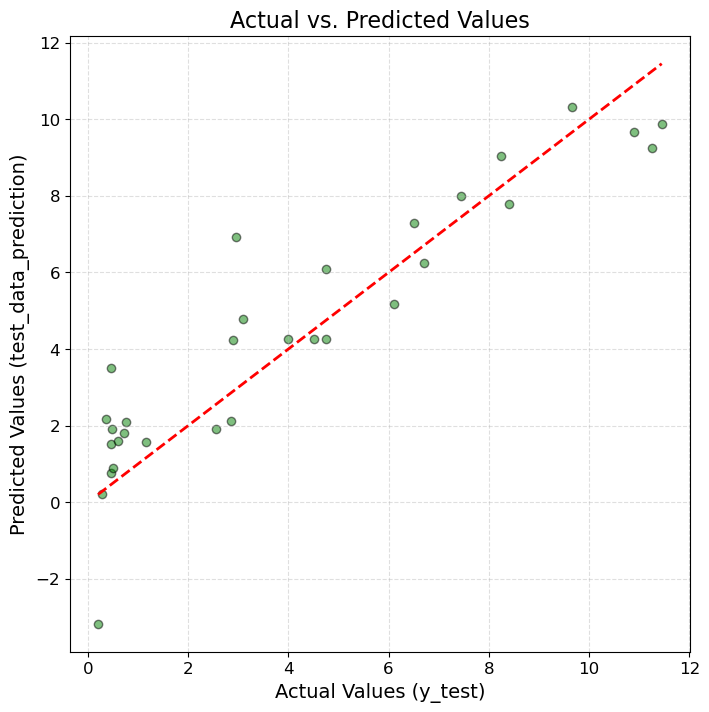

In [196]:
#comparing actual and predicted selling_prices for test data

plt.figure(figsize=(8, 8))

# Scatter plot
plt.scatter(y_test, test_data_prediction, color='green', marker='o', edgecolor='black', alpha=0.5) #alpha for transparency

# Adding a reference line (y = x)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', linewidth=2)

# Titles and labels
plt.title('Actual vs. Predicted Values', fontsize=16)
plt.xlabel('Actual Values (y_test)', fontsize=14)
plt.ylabel('Predicted Values (test_data_prediction)', fontsize=14)

# Grid
plt.grid(True, linestyle='--', alpha=0.4)

# Customize ticks
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Show the plot
plt.show()

## ModelTraining (Lasso Regression)

In [202]:
las_reg_model=Lasso()

In [204]:
# model.fit is used for training model
las_reg_model.fit(x_train,y_train)

Lasso()

## Model Evaluation

In [206]:
# prediction on training data

#predicts price of cars based on the features we have provided in x_train
training_data_prediction=las_reg_model.predict(x_train)

In [208]:
#comparing target output (y_train) and predicted output made by x_train

In [210]:
# R squared error
error_score=metrics.r2_score(y_train, training_data_prediction)
print(error_score)

0.8427856123435794


In [212]:
# error_score through lasso regression is less than linear regression


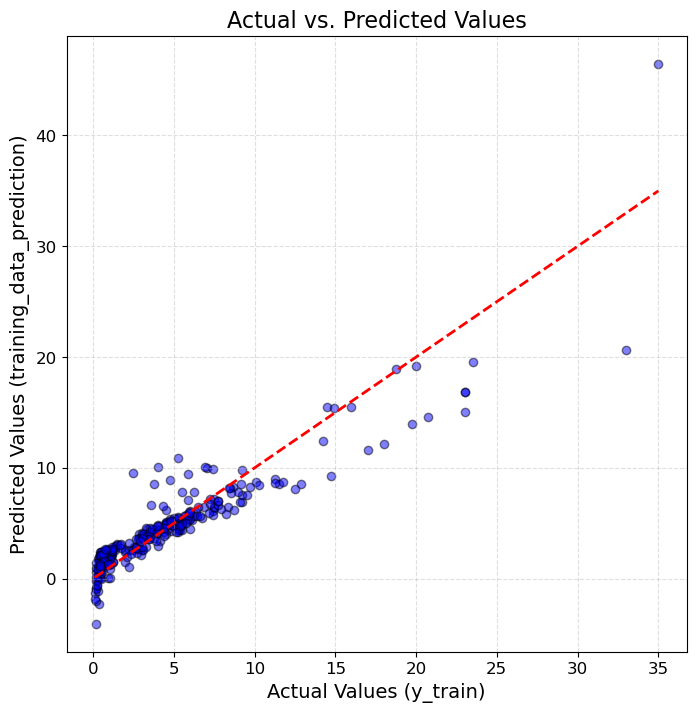

In [214]:
#comparing actual and predicted selling_prices for training data

plt.figure(figsize=(8, 8))

# Scatter plot
plt.scatter(y_train, training_data_prediction, color='blue', marker='o', edgecolor='black', alpha=0.5) #alpha for transparency

# Adding a reference line (y = x)
plt.plot([min(y_train), max(y_train)], [min(y_train), max(y_train)], color='red', linestyle='--', linewidth=2)

# Titles and labels
plt.title('Actual vs. Predicted Values', fontsize=16)
plt.xlabel('Actual Values (y_train)', fontsize=14)
plt.ylabel('Predicted Values (training_data_prediction)', fontsize=14)

# Grid
plt.grid(True, linestyle='--', alpha=0.4)

# Customize ticks
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Show the plot
plt.show()


In [216]:
# prediction on test data

#predicts price of cars based on the features we have provided in x_test
test_data_prediction=las_reg_model.predict(x_test)

In [218]:
# R squared error
error_score2=metrics.r2_score(y_test, test_data_prediction)
print(error_score2)

0.8709167941173195


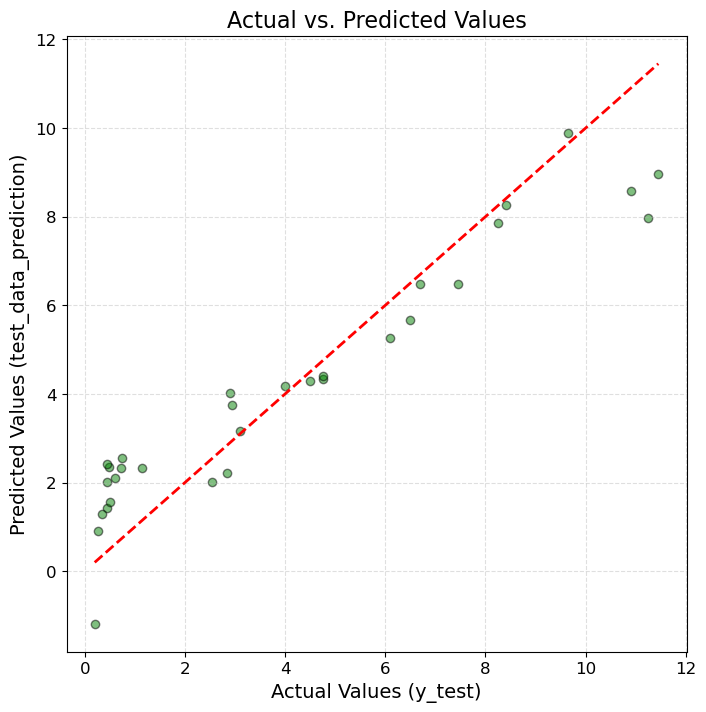

In [220]:
#comparing actual and predicted selling_prices for test data

plt.figure(figsize=(8, 8))

# Scatter plot
plt.scatter(y_test, test_data_prediction, color='green', marker='o', edgecolor='black', alpha=0.5) #alpha for transparency

# Adding a reference line (y = x)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', linewidth=2)

# Titles and labels
plt.title('Actual vs. Predicted Values', fontsize=16)
plt.xlabel('Actual Values (y_test)', fontsize=14)
plt.ylabel('Predicted Values (test_data_prediction)', fontsize=14)

# Grid
plt.grid(True, linestyle='--', alpha=0.4)

# Customize ticks
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Show the plot
plt.show()

## Showcasing actual and Predicted values with visual variation

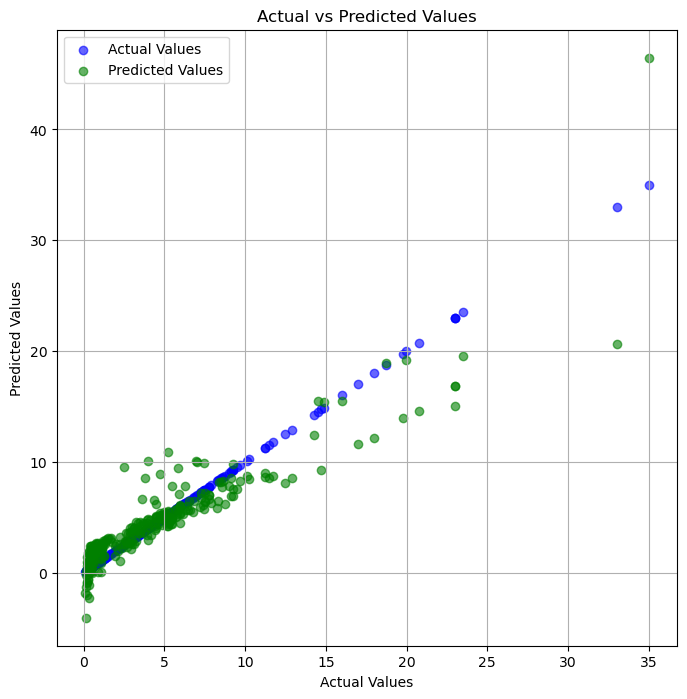

In [225]:
import matplotlib.pyplot as plt

# Assuming y_train contains actual values and training_data_prediction contains predicted values

plt.figure(figsize=(8, 8))

# Scatter plot for actual values
plt.scatter(y_train, y_train, color='blue', label='Actual Values', alpha=0.6)

# Scatter plot for predicted values
plt.scatter(y_train, training_data_prediction, color='green', label='Predicted Values', alpha=0.6)

# Add labels and title
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')

# Add a legend
plt.legend()

# Show grid
plt.grid(True)

# Show plot
plt.show()
